### **load libraries**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.svm import SVR

### **load Data**

In [3]:
df = pd.read_csv(r'/content/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### **Data exploration**

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
df.shape

(200, 4)

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.sample(3)

,TV,Radio,Newspaper,Sales
128,220.3,49.0,3.2,24.7
108,13.1,0.4,25.6,5.3
180,156.6,2.6,8.3,15.5


In [13]:
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [14]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


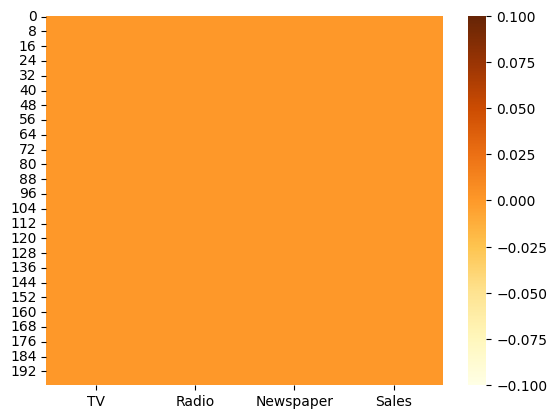

In [20]:
sns.heatmap(df.isnull(), cmap='YlOrBr')
plt.show()

### **data analysis**

In [28]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


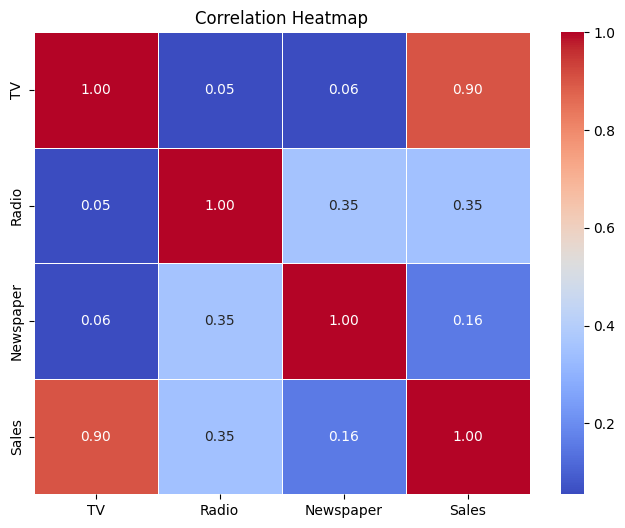

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

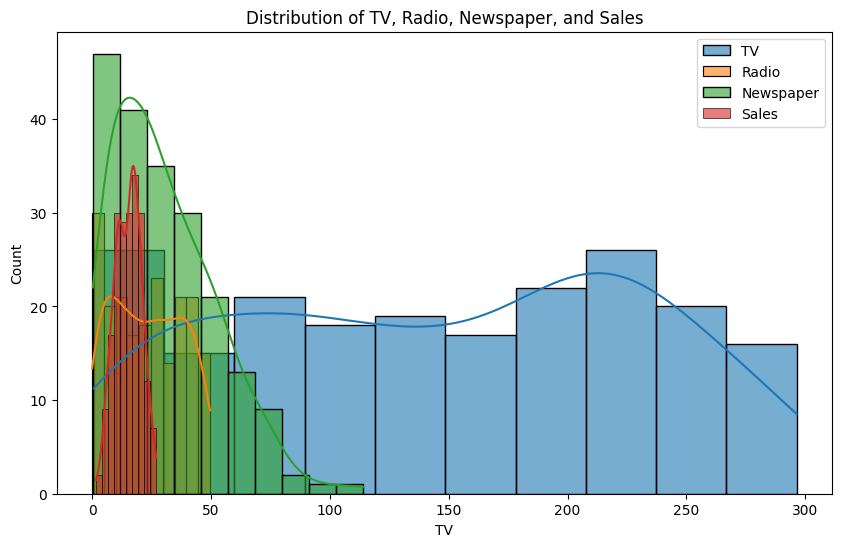

In [22]:
plt.figure(figsize=(10, 6))
for column in ['TV', 'Radio', 'Newspaper', 'Sales']:
    sns.histplot(df[column], kde=True, label=column, bins=10, alpha=0.6)
plt.title('Distribution of TV, Radio, Newspaper, and Sales')
plt.legend()
plt.show()

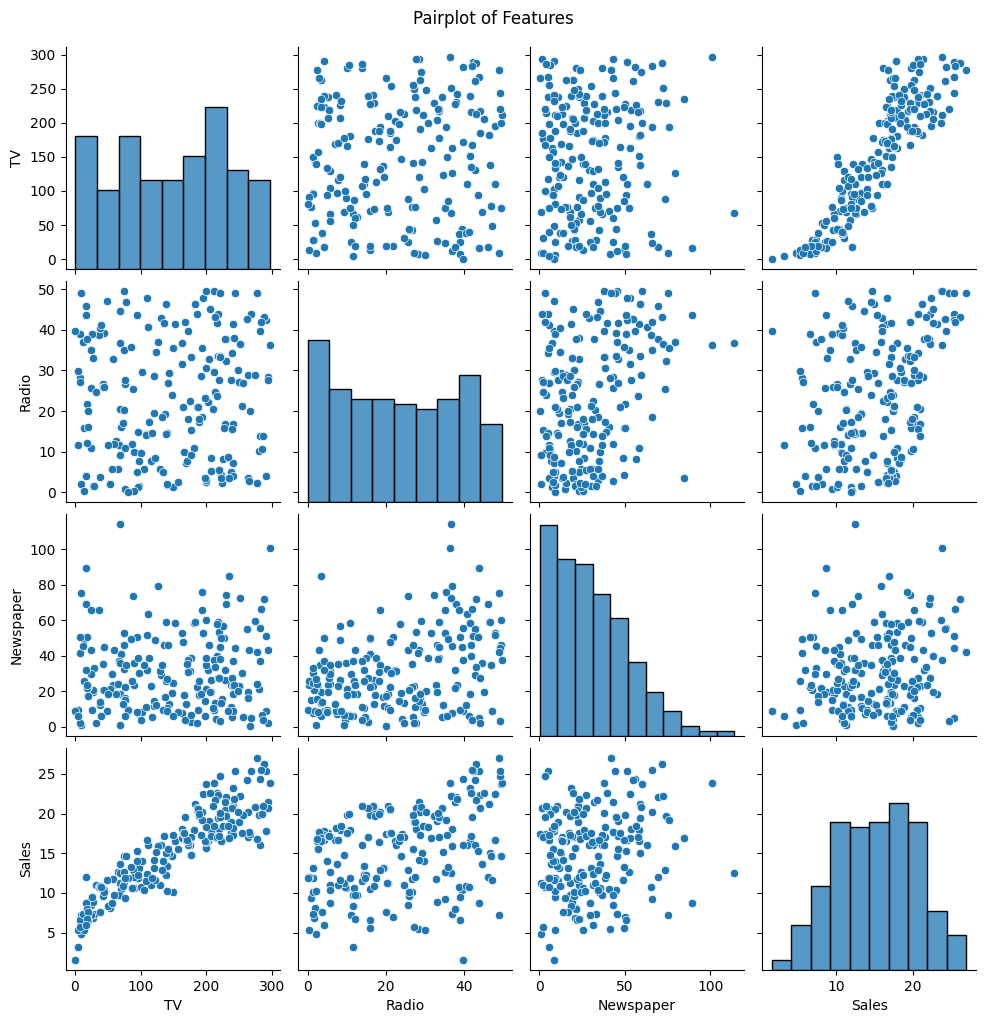

In [23]:
sns.pairplot(df)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

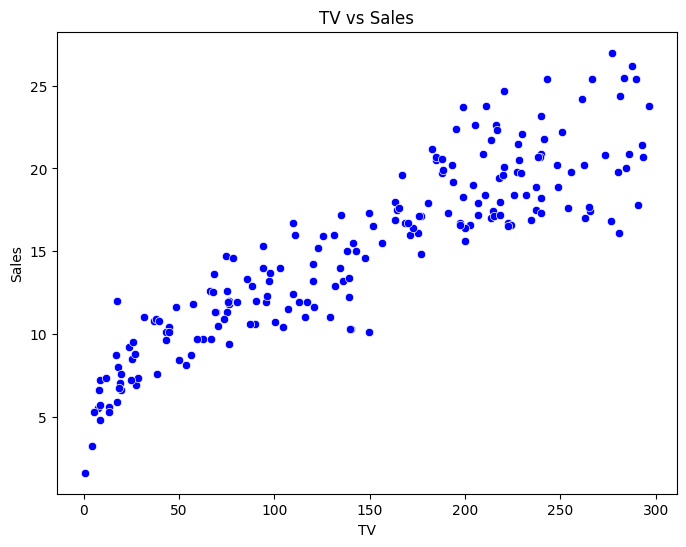

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TV', y='Sales', color='blue')
plt.title('TV vs Sales')
plt.show()

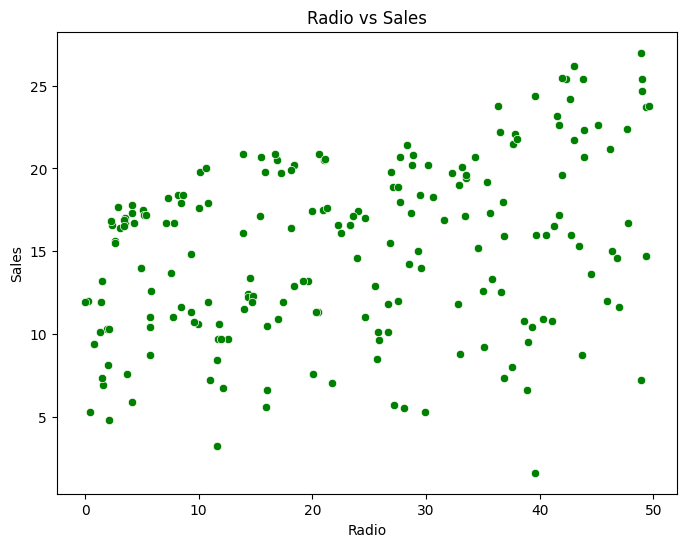

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Radio', y='Sales', color='green')
plt.title('Radio vs Sales')
plt.show()

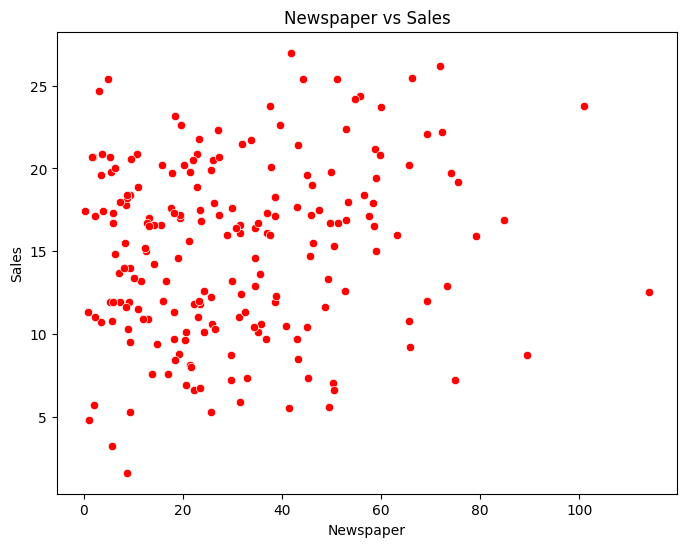

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Newspaper', y='Sales', color='red')
plt.title('Newspaper vs Sales')
plt.show()

### **Create model**

In [33]:
X = df.drop("Sales", axis=1)
y = df['Sales']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state= 44,
                                          shuffle = True)

In [39]:
model1 = SVR()
model1.fit(X_train, y_train)
pred = model1.predict(X_test)
print(model1.score(X_test,y_test))
print(model1.score(X_train,y_train))

0.8724479711545579
0.8819428588392789


In [42]:
print(mean_squared_error(pred,y_test))
print(mean_absolute_error(pred,y_test))

2.0152710349464487
1.132590237570673
